# Holiday Package Prediction

## Deskripsi

Dataset ini menggambarkan profil pelanggan yang sudah ada untuk digunakan dalam menganalisis dan memprediksi apakah customer tersebut akan membeli paket liburan terbaru atau tidak.

## Data

Setiap baris mewakili pelanggan dan setiap kolom berisi atribut pelanggan. Link dowload dataset bisa dilihat [disini](https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction)

In [32]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
# read file into dataframe
df = pd.read_csv('Travel.csv')
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0


# 1. Descriptive Statistics

In [5]:
# view attributes information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
# numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [7]:
# categorical columns
df.select_dtypes(include='object').describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


## Pengamatan

A. Untuk nama kolom dan tipe data sudah sesuai, tetapi ada isi kolom yang mengalami kesalahan penulisan atau bermakna sama, yaitu:
- Pada kolom `Gender` terdapat penulisan **Fe Male** yang seharusnya adalah **Female**.
- Pada kolom `MaritalStatus` status pernikahan **Single** bisa bermakna sama dengan **Unmarried**.

B. Ada beberapa kolom yang memiliki *missing values* karena jumlah barisnya kurang dari total baris data, yaitu **Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact**.

C. Ada kemungkinan terdapat outlier pada beberapa kolom numerik, antara lain:
- Kolom `DurationOfPitch` dan `NumberOfTrips` memiliki nilai maksimum yang sangat jauh dari nilai Q3(75% dari datanya).
- Kolom `MonthlyIncome` memiliki nilai rata-rata yang cukup lebih tinggi dari nilai tengahnya.

 Sedangkan data pada kolom kategorik didominasi (proporsi lebih dari 50% jumlah baris data) oleh *Self Enquiry* (`TypeofContact`) dan *Male* (`Gender`).

In [8]:
# check duplicate rows
print('Apakah terdapat baris yang duplikat ?', df.drop('CustomerID', axis=1).duplicated().any())

Apakah terdapat baris yang duplikat ? True


# 2. Univariate Analysis

In [9]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


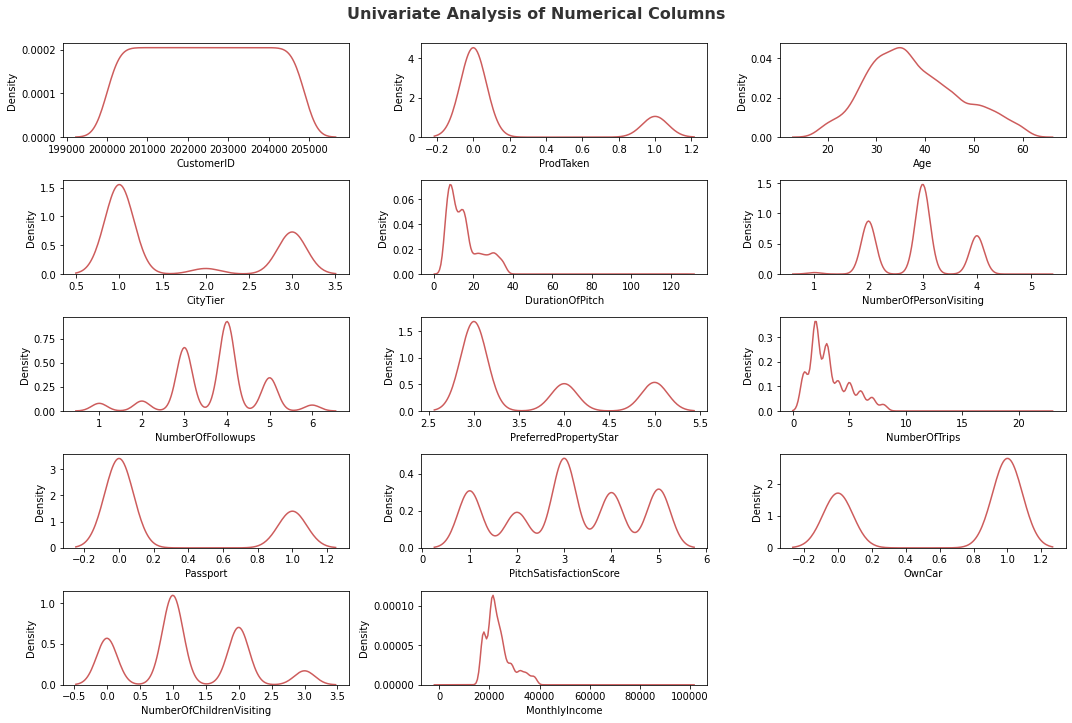

In [11]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns',
             fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
    

## Pengamatan Kolom Numerik

- Kolom `CustomerID` memiliki sebaran data yang terlalu banyak, mungkin dikarenakan pelanggan tiap baris selalu unik sehingga kolom tersebut bisa dihapus nantinya.
- Kolom `Age` sepertinya mendekati distribusi normal.
- Kolom `DurationOfPitch`, `NumberOfTrips`, dan `MonthlyIncome` sepertinya memiliki distribusi data **positive skewed** (menceng ke kanan) yang mengindikasikan terdapat outlier.
- Untuk kolom lain bisa diabaikan karena sejatinya termasuk jenis data diskrit atau ordinal.

In [ ]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns',
             fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()

plt.savefig('hw_plot/univariate_cat.png')

## Pengamatan Kolom Kategorik

- Pada kolom `TypeofContact` didominasi (proporsi data lebih dari 50%) oleh Self Enquiry.
- Pada kolom `Occupation` didominasi Salaried dan Small Business, namun jumlah Free Lancer terlalu sedikit sehingga bisa dihapus.
- Pada kolom `Gender` jenis kelamin laki-laki lebih banyak dibandingkan perempuan. Selain itu terdapat kesalahan penulisan kategori Fe Male yang seharusnya Female.
- Pada kolom `ProductPitched` dan `Designation` didominasi 2 kategori.
- Pada kolom `MaritalStatus` didominasi oleh status Married. Lalu status Single dan Unmarried bisa diartikan sama sehingga bisa digabungkan.

# 3. Multivariate Analysis

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='viridis')
plt.savefig('hw_plot/heatmap.png')

## Pengamatan Heatmap

- Kolom target kita `ProdTaken` memiliki korelasi negatif lemah pada `Age` dan `MontlyIncome`.
- Kolom `NumberOfFollowups` dan `Passport` juga memiliki korelasi positif lemah terhadap `ProdTaken`.
- Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung menjadi fitur kolom baru.

In [ ]:
# numerical columns with target
num_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
plt.figure(figsize=(10, 8))
plt.suptitle('Multivariate Analysis of Numerical Columns',
             fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols2)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=num_cols2[i],
                hue='ProdTaken', palette=['indianred','seagreen'])
    plt.xlabel(num_cols2[i])
    plt.tight_layout()
    
plt.savefig('hw_plot/multivariate_num.png')

## Pengamatan Kolom Numerik

- Pada kolom `CustomerID` karena datanya memiliki nilai unik tiap baris maka bisa diabaikan sebagai fitur.
- Customer yang membeli paket perjalanan kebanyakan berumur 20-35.
- Durasi Pitch yang dilakukan sales dibawah 20 menit memungkinkan customer untuk membeli paket perjalanan.
- Jumlah perjalanan yang pernah diambil customer kebanyakan tidak lebih 5 selama setahun.
- Customer dengan pendapatan bulanan berkisar 150000-250000 kemungkinan lebih tertarik membeli paket perjalanan.

In [ ]:
# categorical columns with target
cat_cols2 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation',
            'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
            'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
plt.figure(figsize=(15, 15))
plt.suptitle('Multivariate Analysis of Categorical Columns',
             fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols2)):
    plt.subplot(5, 3, i+1)
    sns.countplot(data=df, x=cat_cols2[i],
                  hue='ProdTaken', palette=['indianred','seagreen'])
    plt.tight_layout()
    
plt.savefig('hw_plot/multivariate_cat.png')

## Pengamatan Kolom Kategorik

- Customer dengan tipe kontak Self Enquiry lebih tinggi untuk membeli paket perjalanan dibandingkan Company Invited.
- Customer dengan Occupation Salaried dan Small Business lebih tertarik membeli paket perjalanan, dan Free Lancer yang sudah pasti membeli paket perjalanan.
- Customer laki-laki lebih banyak membeli paket perjalanan dibandingkan perempuan.
- Jenis produk Basic yang ditawarkan sales ke customer lebih banyak dibeli.
- Customer yang Married maupun Single atau Unmarried lebih banyak untuk membeli paket perjalanan.
- Paket perjalanan yang ditawarkan kepada customer Executive lebih banyak dibeli.
- Customer yang berada di City Tier 1 dan 3 lebih tertarik membeli paket perjalanan.
- Jumlah orang yang akan bepergian 2-4 lebih banyak membeli paket perjalanan.
- Customer yang difollow up >=3 kali setelah pitching lebih banyak membeli paket perjalanan.
- Customer yang memberikan rating 3 pada properti hotel yang akan digunakan selama liburan lebih banyak membeli paket perjalanan.
- Customer yang memiliki passport sedikit lebih banyak membeli paket perjalanan.
- Customer yang memberikan score kepuasan >=3 lebih banyak membeli paket perjalanan.
- Customer yang memiliki mobil lebih banyak membeli paket perjalanan.
- Customer dengan jumlah anak dibawah 5 tahun adalah 0 atau 1 lebih banyak membeli paket perjalanan

## EDA Conclusion

Dari hasil EDA yang telah dilakukan dapat disimpulkan bahwa :
1. Nama kolom dan tipe data sudah sesuai , tetapi ada kesalahan data pada kolom `Gender` dan kesamaan makna data pada kolom `Marital Status`.
2. Terdapat *missing values* pada kolom `Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact`.
3. Terdapat outlier pada kolom `DurationOfPitch, NumberOfTrips, MonthlyIncome`.
4. Telah ditemukan baris yang duplikat pada dataset yang digunakan.
5. Kolom `CustomerID` bisa dihapus karena setiap baris memiliki customer id yang berbeda-beda.
6. Kolom `ProdTaken` adalah target yang akan diprediksi.
7. Kolom numerik yang terlihat memiliki korelasi terhadap target dapat digunakan sebagai fitur, yaitu `Age`, `MontlyIncome`, `NumberOfFollowups` dan `Passport`.
8. Kolom `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` memiliki korelasi positif cukup kuat sehingga bisa digabung untuk menjadi fitur baru (`TotalVisiting`).
9. Beberapa kolom numerik yang terlihat sama sekali tidak berkorelasi terdapat target dapat dihapus.
10. Pada kolom kategorik bisa dimasukkan fitur semua karena kategorinya tidak terlalu banyak dan jumlah data tiap kategorinya tidak terlalu timpang, yaitu `TypeofContact`, `Occupation`, `Gender`, `ProductPitched`, `MaritalStatus`, dan `Designation`.

## Preprocessing Recommendation

Berdasarkan hasil EDA maka hal yang dapat kita lakukan saat preprocessing adalah:
1.  - Kesalahan data pada isi kolom `Gender` yaitu Fe Male diganti Female.
    - Kesamaan makna pada isi kolom ` MaritalStatus` yaitu Single diganti Unmarried.
    - Data Free Lancer pada kolom `Occupation` terlalu sedikit sehingga bisa dihapus.
2.  - Nilai null pada kolom `Age` akan diisi dengan nilai mean (disribusi data mendekati normal).
    - Nilai null pada kolom `TypeofContact` akan diisi dengan nilai **Unknown** (nilai modus sudah terlalu tinggi).
    - Nilai null pada kolom `DurationOfPitch` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
    - Nilai null pada kolom `NumberOfFollowups` akan disi dengan nilai median (nilai median dianggap moderate jumlahnya).
    - Nilai null pada kolom `PreferredPropertyStar` akan diisi dengan nilai min atau 3 (nilai rating terkecil tetapi masih standar).
    - Nilai null pada kolom `NumberOfTrips` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
    - Nilai null pada kolom `NumberOfChildrenVisiting` akan diisi dengan nilai min (dianggap tidak memiliki anak dibawah 5 tahun).
    - Nilai null pada kolom `MonthlyIncome` akan disi dengan nilai median (distribusi data mengandung outlier karena skewed).
3. Baris yang duplikat bisa dihapus terlebih dahulu.
4. Kolom yang mengandung outlier akan ditangani menggunakan **pendekatan z-score** (membuang ~0.3% data paling ekstrim).
5. Melakukan **feature engineering** yaitu membuat kolom baru `TotalVisiting` = `NumberOfPersonVisiting` + `NumberOfChildrenVisiting`.
6. Melakukakan scaling data pada kolom numerik dengan **Normalization** bagi kolom yang mendekati distribusi normal.
7. Melakukakan scaling data pada kolom numerik dengan **Standardization** bagi kolom dengan distribusi skewed.
8. Pada kolom kategorik yang memiliki unique values adalah 2 atau bertipe ordinal dapat dilakukan **Label Encoding**.
9. Selain kolom kategorik dengan kondisi tersebut dapat dilakukan **One Hot Encoding**.
10. Kolom target yaitu `ProdTaken` memiliki proporsi yang tidak seimbang (imblance class)maka sebelum pemodelan dapat dilakukan sampling menggunakan metode **SMOTE**.

# 4. Business Insight

In [12]:
# copy dataframe
df2 = df.copy()

## 1. Produk manakah yang membuat customer tertarik untuk membelinya?

In [13]:
df_product = df2.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')
df_product

,ProductPitched,ProdTaken,TotalCust
0,Basic,0,1290
1,Basic,1,552
2,Deluxe,0,1528
3,Deluxe,1,204
4,King,0,210
5,King,1,20
6,Standard,0,618
7,Standard,1,124
8,Super Deluxe,0,322
9,Super Deluxe,1,20


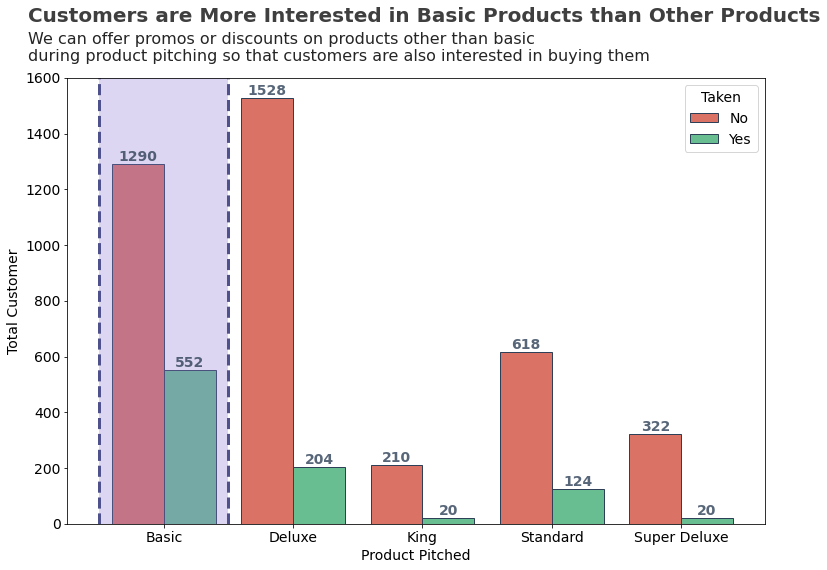

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=df_product, x='ProductPitched', y='TotalCust', hue='ProdTaken',
            palette=['#EE6352', '#59CD90'], edgecolor='#2E4057')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Product Pitched', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)
plt.ylim(0, 1600)
plt.stackplot(np.arange(-0.5, 1.5 ,1), [[1600]], colors='#907AD6', alpha=0.3)
plt.axvline(x=-0.5, color='#4F518C', linestyle='--', linewidth=3)
plt.axvline(x=0.5, color='#4F518C', linestyle='--', linewidth=3) 

data_bars = df_product.sort_values('ProdTaken')['TotalCust'].values
for rec, data in zip(ax.patches, data_bars) :
    ax.text(rec.get_x() + rec.get_width() / 2,
            rec.get_y() + rec.get_height(),
            data, fontsize=14, fontweight='bold',
            color='#2E4057', alpha=0.8, va='bottom', ha='center')
ax.text(s='Customers are More Interested in Basic Products than Other Products', 
        x=-1.05, y=1800, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='We can offer promos or discounts on products other than basic\nduring product pitching so that customers are also interested in buying them',
        x=-1.05, y=1660, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
# plt.savefig('fig/insight1.png')

## 2. Apakah jumlah follow up dari sales mempengaruhi pelanggan untuk membeli paket perjalanan baru? 

In [16]:
followup_total = pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken']).stack().reset_index(name='TotalCust')
followup_perc = round(pd.crosstab(df2['NumberOfFollowups'], df2['ProdTaken'], normalize='index')*100, 2)
followup_perc = followup_perc.stack().reset_index(name='PercCust')

df_followups = followup_total.merge(followup_perc, on=['NumberOfFollowups', 'ProdTaken'])
df_followups

,NumberOfFollowups,ProdTaken,TotalCust,PercCust
0,1.0,0,156,88.64
1,1.0,1,20,11.36
2,2.0,0,205,89.52
3,2.0,1,24,10.48
4,3.0,0,1222,83.36
5,3.0,1,244,16.64
6,4.0,0,1689,81.67
7,4.0,1,379,18.33
8,5.0,0,577,75.13
9,5.0,1,191,24.87


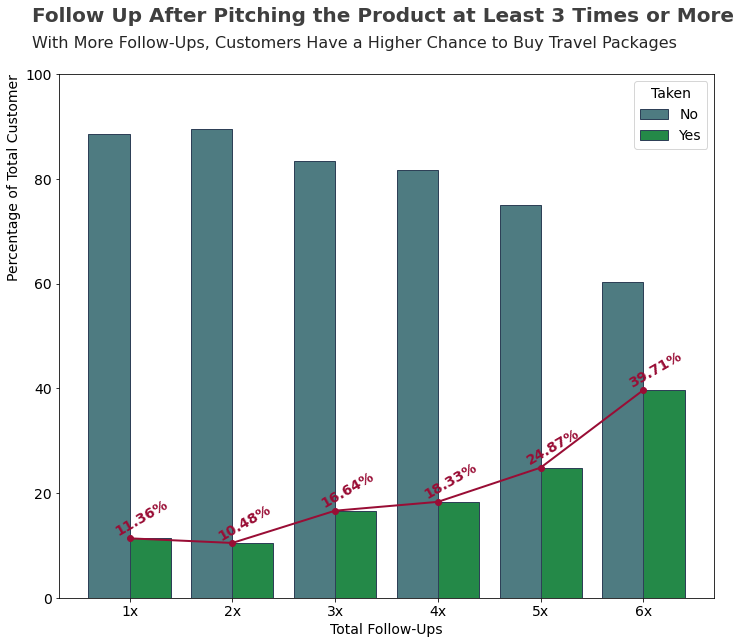

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(11,9))
sns.barplot(data=df_followups, x='NumberOfFollowups', y='PercCust', hue='ProdTaken', 
            ax=ax, palette=['#468189', '#139A43'], edgecolor='#2E4057')
line_p = df_followups[df_followups['ProdTaken']==1]
ax.plot(np.arange(0,6), line_p['PercCust'], color='#990D35', linewidth=2, marker='o')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Total Follow-Ups', fontsize=14)
ax.set_ylabel('Percentage of Total Customer', fontsize=14, loc='top')
ax.set_xticklabels([x.get_text()[0]+'x' for x in ax.get_xticklabels()])
plt.ylim(0, 100)

data_bars = df_followups[df_followups['ProdTaken']==1]['PercCust'].values
for rec, data in zip(ax.containers[1], data_bars) :
    ax.text(rec.get_x() + rec.get_width(),
            rec.get_y() + rec.get_height(),
            '{}%'.format(data), fontsize=14, fontweight='bold',
            color='#990D35', va='bottom', ha='right', rotation=30)
ax.text(s='Follow Up After Pitching the Product at Least 3 Times or More', 
        x=-0.95, y=110, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='With More Follow-Ups, Customers Have a Higher Chance to Buy Travel Packages',
        x=-0.95, y=105, fontsize=16, alpha =.85)

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
# plt.savefig('fig/insight2.png')

## 3. Kelompok umur manakah yang lebih tertarik membeli paket perjalanan baru? 

Kategori umur menurut **Departemen Kesehatan Republik Indonesia** tahun 2009 yakni sebagai berikut :
- Masa balita usia 0 – 5 tahun
- Masa kanak-kanak usia 5 – 11 tahun
- Masa remaja awal usia 12 – 16 tahun
- Masa remaja akhir usia 17 – 25 tahun
- Masa dewasa awal usia 26 – 35 tahun
- Masa dewasa akhir usia 36 – 45 tahun
- Masa lansia awal usia 46 – 55 tahun
- Masa lansia akhir usia 56 – 65 tahun
- Masa manula usia 65 – ke atas

In [19]:
print('Age data is start from {} to {}'.format(int(df2['Age'].min()), int(df2['Age'].max())))

Age data is start from 18 to 61


Dari kategorisasi tersebut maka kami mengelompokkan data umur menjadi :
- Youth : 18 - 25 tahun
- Adult : 26 - 45 tahun
- Elderly : 46 - 61 tahun

In [20]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Youth'
    elif x<=45:
        return 'Adult'
    else:
        return 'Elderly'
    
df2['AgeGroup'] = df2['Age'].apply(lambda x : age_group(x))
age_group = df2.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')
age_group

,AgeGroup,ProdTaken,TotalCust
0,Adult,0,2752
1,Adult,1,589
2,Elderly,0,1012
3,Elderly,1,188
4,Youth,0,204
5,Youth,1,143


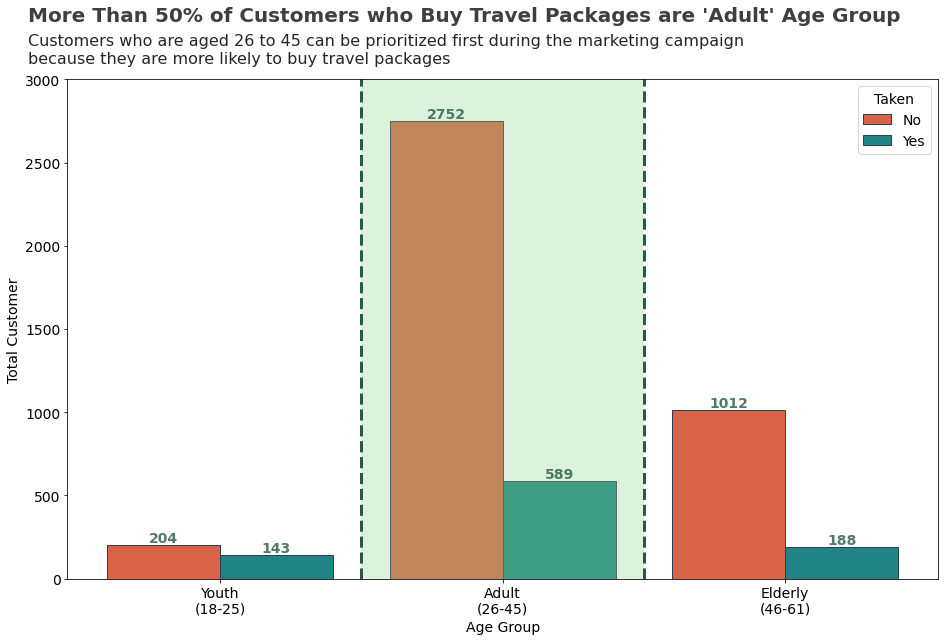

In [22]:
age_order = ['Youth', 'Adult', 'Elderly']
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.barplot(data=age_group, x='AgeGroup', y='TotalCust', hue='ProdTaken',
            order=age_order, palette=['#F2542D', '#0E9594'], edgecolor='#2E4057')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Customer', fontsize=14)

label_x = []
for x in age_order:
    minimum = int(df2[df2['AgeGroup']==x]['Age'].min())
    maksimum = int(df2[df2['AgeGroup']==x]['Age'].max())
    label_x.append('('+str(minimum)+'-'+str(maksimum)+')')
ax.set_xticklabels([x.get_text()+'\n'+lab for x, lab in zip(ax.get_xticklabels(), label_x)])
plt.ylim(0, 3000)

plt.stackplot(np.arange(0.5, 2 ,1), [[3000]], colors='#8CD790', alpha=0.3)
plt.axvline(x=0.5, color='#285943', linestyle='--', linewidth=3)
plt.axvline(x=1.5, color='#285943', linestyle='--', linewidth=3) 

no = []
yes = []
for g in age_order:
    dfg = age_group[age_group['AgeGroup']==g]
    no.extend(dfg[dfg['ProdTaken']==0]['TotalCust'].values) 
    yes.extend(dfg[dfg['ProdTaken']==1]['TotalCust'].values)
data_bars = no + yes
    
for rec, data in zip(ax.patches, data_bars) :
    ax.text(rec.get_x() + rec.get_width() / 2,
            rec.get_y() + rec.get_height(),
            data, fontsize=14, fontweight='bold',
            color='#285943', alpha=0.8, va='bottom', ha='center')
ax.text(s="More Than 50% of Customers who Buy Travel Packages are 'Adult' Age Group", 
        x=-0.68, y=3350, fontsize=20, fontweight='bold', alpha =.75)
ax.text(s='Customers who are aged 26 to 45 can be prioritized first during the marketing campaign\nbecause they are more likely to buy travel packages',
        x=-0.68, y=3100, fontsize=16, alpha =.85)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No', 'Yes'], fontsize=14, title_fontsize=14, title='Taken')
plt.tight_layout()
# plt.savefig('fig/insight3.png')

## 4. Apakah semakin lama duration of pitch dan jumlah follow up dari sales mempengaruhi pelanggan untuk membeli paket perjalanan baru? 

In [23]:
df2 = df.copy()
df2 = df2.iloc[:,1:]


In [24]:
df2.drop_duplicates(inplace=True)

In [25]:
_all = df2.groupby('DurationOfPitch')[['ProdTaken']].count()
yes = df2[df2['ProdTaken']==1].groupby('DurationOfPitch')[['ProdTaken']].count()
semua = yes.merge(_all,on='DurationOfPitch',how='left')
semua['%']=round((semua['ProdTaken_x']*100/semua['ProdTaken_y']),2)
semua.reset_index(inplace=True)#
semua.sort_values(by='%',ascending=False,inplace=True)
semua = semua.head(18)
semua

,DurationOfPitch,ProdTaken_x,ProdTaken_y,%
25,31.0,30,80,37.50
13,19.0,20,55,36.36
24,30.0,28,90,31.11
14,20.0,18,61,29.51
23,29.0,20,71,28.17
22,28.0,17,61,27.87
16,22.0,22,88,25.00
17,23.0,19,77,24.68
12,18.0,18,73,24.66
30,36.0,9,41,21.95


In [26]:
f_all = df2.groupby('NumberOfFollowups')[['ProdTaken']].count()
f_yes = df2[df2['ProdTaken']==1].groupby('NumberOfFollowups')[['ProdTaken']].count()
f_semua = f_yes.merge(f_all,on='NumberOfFollowups',how='left')
f_semua['%']=round((f_semua['ProdTaken_x']*100/f_semua['ProdTaken_y']),2)
f_semua.reset_index(inplace=True)#
f_semua.sort_values(by='%',ascending=False,inplace=True)
f_semua

,NumberOfFollowups,ProdTaken_x,ProdTaken_y,%
5,6.0,53,135,39.26
4,5.0,188,745,25.23
3,4.0,367,1999,18.36
2,3.0,234,1421,16.47
0,1.0,20,175,11.43
1,2.0,24,228,10.53


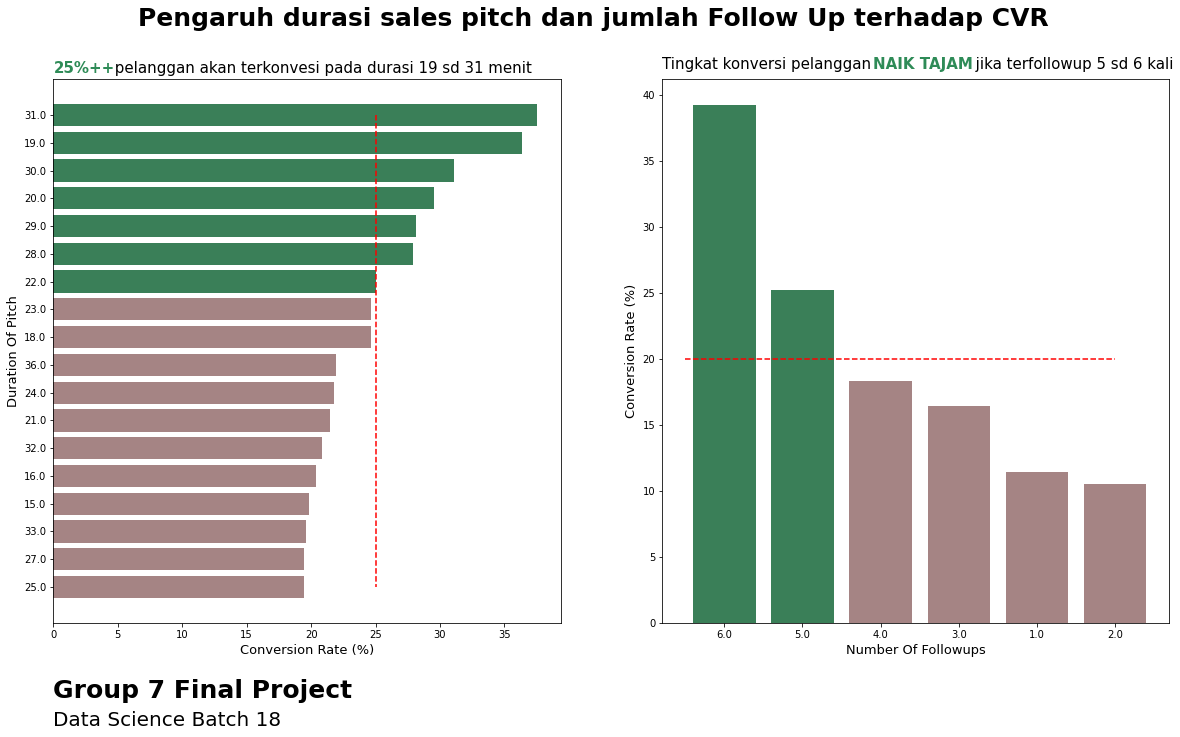

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x='%',y='DurationOfPitch',data=semua,orient='h',order=semua['DurationOfPitch'],color='indianred',saturation=0.3)
sns.barplot(x='%',y='DurationOfPitch',data=semua.head(7),orient='h',order=semua['DurationOfPitch'],color='seagreen')
plt.xlabel('Conversion Rate (%)',size=13)
plt.ylabel('Duration Of Pitch',size=13)
plt.vlines(25,0,17,linestyles='dashed',colors='r')
plt.suptitle('Pengaruh durasi sales pitch dan jumlah Follow Up terhadap CVR',size=25,family='sans',weight='bold')
plt.text(0,-1.5,s='             pelanggan akan terkonvesi pada durasi 19 sd 31 menit',fontdict=({'size':15,'family':'sans'}))
plt.text(0,-1.5,s='25%++',fontdict=({'size':15,'family':'sans'}),c='seagreen',weight='bold')

plt.text(0,21,'Group 7 Final Project',fontsize=25,fontweight='bold')
plt.text(0,22,'Data Science Batch 18 ',fontsize=20)

plt.subplot(1,2,2)
sns.barplot(x='NumberOfFollowups',y='%',data=f_semua,orient='v',order=f_semua['NumberOfFollowups'],color='indianred',saturation=0.3)
sns.barplot(x='NumberOfFollowups',y='%',data=f_semua.head(2),orient='v',order=f_semua['NumberOfFollowups'],color='seagreen')
plt.ylabel('Conversion Rate (%)',size=13)
plt.xlabel('Number Of Followups',size=13)
plt.hlines(20,-.5,5,linestyles='dashed',colors='r')
plt.text(-0.8,42,s='Tingkat konversi pelanggan                      jika terfollowup 5 sd 6 kali',fontdict=({'size':15,'family':'sans'}))
plt.text(1.9,42,s='NAIK TAJAM',fontdict=({'size':15,'family':'sans'}),c='seagreen',weight='bold')
plt.show()


## Apakah kategori umur mempengaruhi pelanggan untuk membeli paket perjalanan baru? 

In [28]:
# imputasi missing value age dengan rata2 dikarenakan distriusi featere age mendekati normal
df2.loc[df2.Age.isna(),'Age']   =df2.Age.mean()

In [30]:
df2['cat_age']=np.where(df2.Age<=27,'Gen-Z',np.where(df2.Age>43,'Gen-X',np.where(df2.Age.isna()==True,'Invalid','Gen-Y')))
df2['cat_salary']=np.where(df2.MonthlyIncome<=20000,'Low',np.where(df2.MonthlyIncome<=25000,'Medium',np.where(df2.MonthlyIncome<=30000,'High','Very High')))
a = df2.groupby(['cat_age','ProdTaken']).agg({'CityTier':'count'}).reset_index()
b= df2.groupby(['cat_age',]).agg({'CityTier':'count'})
catage = a.merge(b,on='cat_age')
catage['%']=round(catage['CityTier_x']*100/catage['CityTier_y'],2)
catage

,cat_age,ProdTaken,CityTier_x,CityTier_y,%
0,Gen-X,0,981,1158,84.72
1,Gen-X,1,177,1158,15.28
2,Gen-Y,0,2495,3004,83.06
3,Gen-Y,1,509,3004,16.94
4,Gen-Z,0,377,585,64.44
5,Gen-Z,1,208,585,35.56


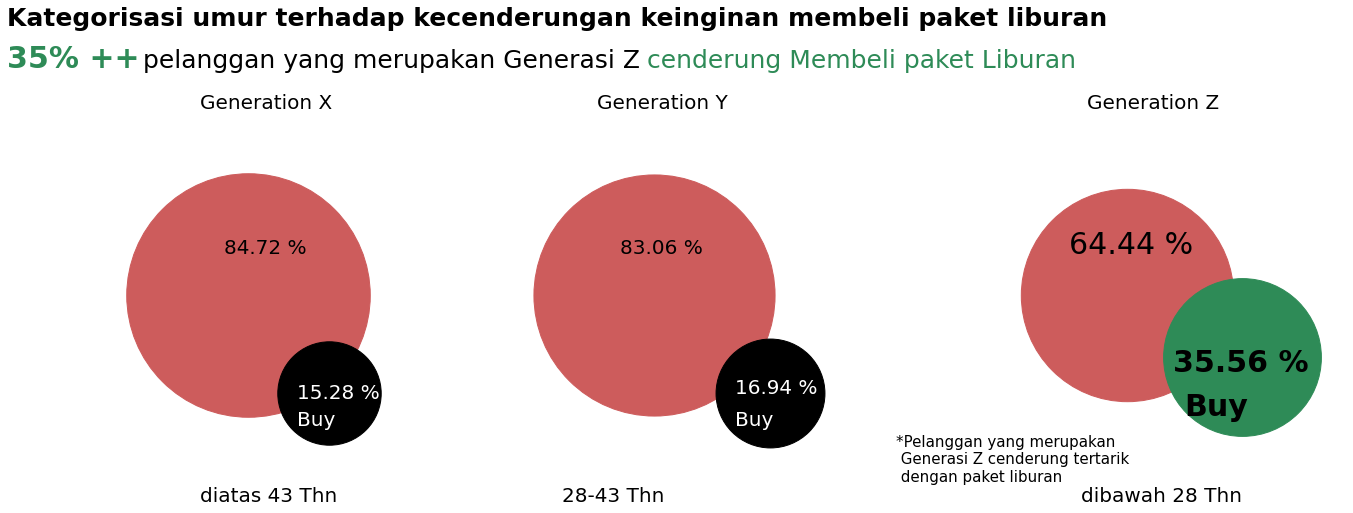

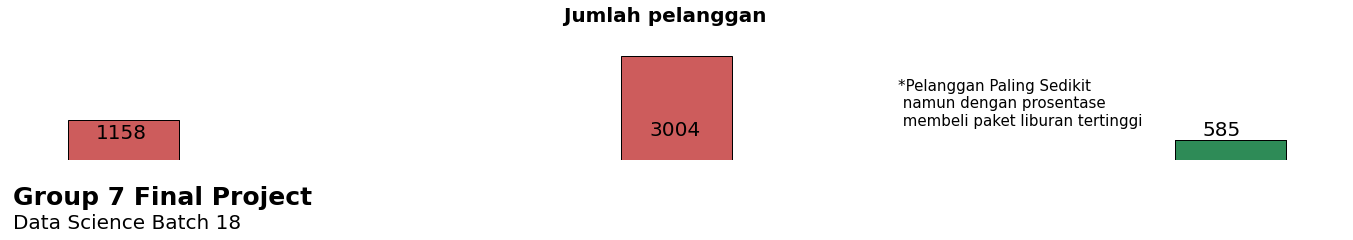

In [36]:
matplotlib.rcParams['font.family'] = 'sans'
# Gen x
figure, axs =plt.subplots(1,3,figsize=[24,8])
axs[0].text(-3,1.3,'Kategorisasi umur terhadap kecenderungan keinginan membeli paket liburan ',fontsize=25,fontweight='bold')
axs[0].text(-3,1.1,'                 pelanggan yang merupakan Generasi Z',fontsize=25)
axs[0].text(-3,1.1,'                                                                                cenderung Membeli paket Liburan',fontsize=25,fontdict={'color':'seagreen'})
axs[0].text(-3,1.1,'35% ++',fontsize=30,fontweight='bold',fontdict={'color':'seagreen'})
# 
axs[0].scatter(catage.iloc[[0]]['ProdTaken'], catage.iloc[[0]]['cat_age'], color='indianred', s=catage.iloc[[0]]['%']*700)
axis_2 = axs[0]. twinx() 
axis_2. scatter(catage.iloc[[1]]['ProdTaken'], catage.iloc[[1]]['cat_age'], color=['black'], s=catage.iloc[[1]]['%']*700,alpha=1)
axis_2.set_xticks(ticks=[-3,1.9],labels='')
axs[0].set_yticks(ticks=[-1,1.1],labels=['',''])
axis_2.set_yticks(ticks=[-1,3],labels=['',''])
axis_2.text(x=.6,y=-.05,s='15.28 %',fontsize=20,fontdict={'color':'white'},)
axs[0].text(-0.6,.9,'Generation X ',fontsize=20,)
axis_2.text(.6,-.3,'Buy',fontsize=20,fontdict={'color':'white'})
axis_2.text(-0.6,-1,'diatas 43 Thn ',fontsize=20,fontdict={'color':'Black'})
axs[0].text(-0.3,.2,s='84.72 %',fontsize=20,)
axs[0].axis('off')
axis_2.axis('off')


# Gen Y
axs[1].scatter(catage.iloc[[2]]['ProdTaken'], catage.iloc[[2]]['cat_age'], color='indianred', s=catage.iloc[[2]]['%']*700,alpha=1)
axis_4 = axs[1]. twinx() 
axis_4. scatter(catage.iloc[[3]]['ProdTaken'], catage.iloc[[3]]['cat_age'], color=['black'], s=catage.iloc[[3]]['%']*700,alpha=1)
axis_4.set_xticks(ticks=[-1.51,1.9],labels='')
axs[1].set_yticks(ticks=[-1,1.1],labels=['',''])
axis_4.set_yticks(ticks=[-1,3],labels=['',''])
axis_4.text(.7,0,'16.94 %',fontsize=20,fontdict={'color':'white'},)
axis_4.text(.7,-.3,'Buy',fontsize=20,fontdict={'color':'white'},)
axs[1].text(-0.5,.9,'Generation Y',fontsize=20,)
axs[1].text(-0.3,.2,'83.06 %',fontsize=20,)
axis_4.text(-0.8,-1,'28-43 Thn ',fontsize=20,fontdict={'color':'Black'})
axs[1].axis('off')
axis_4.axis('off')

# GnZ
axs[2].scatter(catage.iloc[[4]]['ProdTaken'], catage.iloc[[4]]['cat_age'], color='indianred', s=catage.iloc[[4]]['%']*700,alpha=1)
axis_6 = axs[2]. twinx() 
axis_6. scatter(catage.iloc[[5]]['ProdTaken'], catage.iloc[[5]]['cat_age'], color=['seagreen'], s=catage.iloc[[5]]['%']*700,alpha=1)
axis_6.set_xticks(ticks=[-1.51,1.9],labels='')
axs[2].set_xticks(ticks=[-1,0.1],labels=['',''])
axs[2].set_yticks(ticks=[-1,1.1],labels=['',''])
axis_6.set_yticks(ticks=[-1,2],labels=['',''])
axs[2].text(-0.5,.2,'64.44 %',fontsize=30,)
axis_6.text(.4,-.1,'35.56 %',fontsize=30,fontweight='bold' )
axis_6.text(.5,-.4,'Buy',fontsize=30,fontweight='bold' )
axs[2].text(-0.35,.9,'Generation Z',fontsize=20,)
axis_6.text(-0.4,-1,'dibawah 28 Thn ',fontsize=20,fontdict={'color':'Black'})
axs[2].axis('off')
axis_6.axis('off')
axs[2].text(-2,-.9,'*Pelanggan yang merupakan \n Generasi Z cenderung tertarik \n dengan paket liburan ',fontsize=15,)


plt.subplots(1,figsize=[24,2])

plt.bar(x='cat_age',height='CityTier_y', data = catage.iloc[[0,2,4]],width=0.2,color='indianred',edgecolor='black')
plt.bar(x='cat_age',height='CityTier_y', data = catage.iloc[[4]],width=0.2,color='seagreen',edgecolor='black')
plt.text(0-.05,600,'1158',fontsize=20,fontdict={'color':'black'})
plt.text(1-.05,700,'3004',fontsize=20,fontdict={'color':'black'})
plt.text(2-.05,700,'585',fontsize=20,fontdict={'color':'black'})
plt.text(0,4000,'                                                               Jumlah pelanggan',fontsize=20,fontweight='bold')
plt.text(1+.4,1000,'*Pelanggan Paling Sedikit\n namun dengan prosentase \n membeli paket liburan tertinggi',fontsize=15,fontdict={'color':'black'})
plt.axis('off')
plt.text(-.2,-1300,'Group 7 Final Project',fontsize=25,fontweight='bold')
plt.text(-.2,-2000,'Data Science Batch 18 ',fontsize=20)
plt.axis('off')
plt.show()
